## Step1: Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
df = pd.read_csv("Data/mall_customers.csv",index_col=0,header=0)

df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


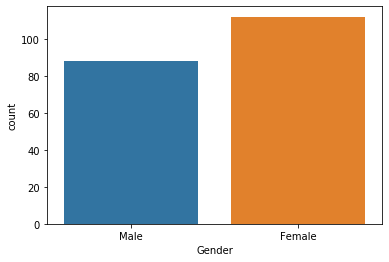

In [3]:
# count plot on single categorical variable
sns.countplot(x ='Gender', data = df)
 
# Show the plot
plt.show()

In [4]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

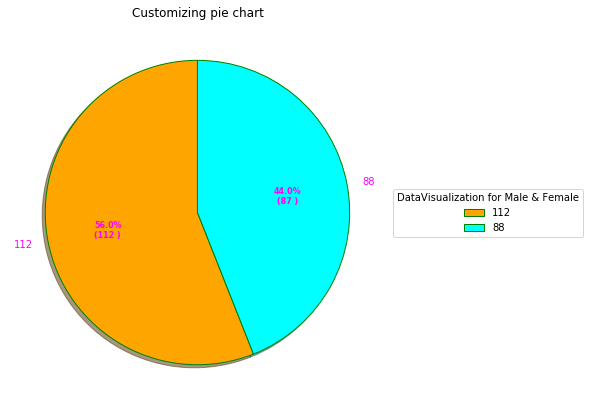

In [5]:

# Creating dataset
Data = [112,88]
 
Keys = ["Female","Male"]
 
 
# Creating explode data
explode = (0.0, 0.0)
 
# Creating color parameters
colors = ( "orange",
           "cyan")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(Data,
                                  autopct = lambda pct: func(pct, Data),
                                  explode = explode,
                                  labels = Data,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, Data,
          title ="DataVisualization for Male & Female",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

#### Observation
- we can see that there are more females (112) customers than Male(88) customers in the data set.

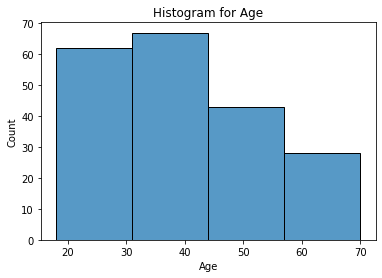

In [25]:
# Histogram plot

sns.histplot(data=df,x="Age",bins=4,kde=False)
plt.title("Histogram for Age")
plt.show()

#### Observation
- Major customers are from age 20 to 45 `

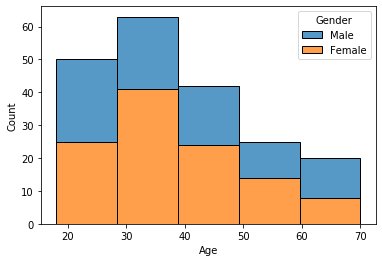

In [7]:
sns.__version__

'0.11.2'

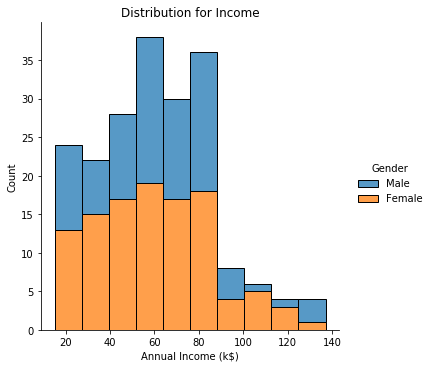

In [40]:
sns.displot(df, x="Annual Income (k$)",hue="Gender",multiple="stack")

plt.title("Distribution for Income")

plt.show()

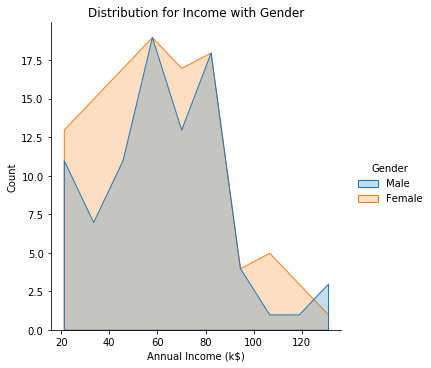

In [53]:
sns.displot(df, x="Annual Income (k$)",hue="Gender",element="poly")

plt.title("Distribution for Income with Gender")

plt.show()

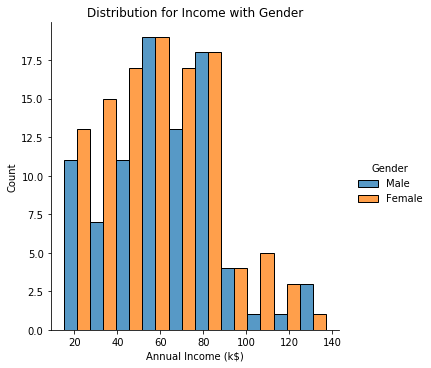

In [54]:
sns.displot(df, x="Annual Income (k$)",hue="Gender",multiple="dodge")

plt.title("Distribution for Income with Gender")

plt.show()

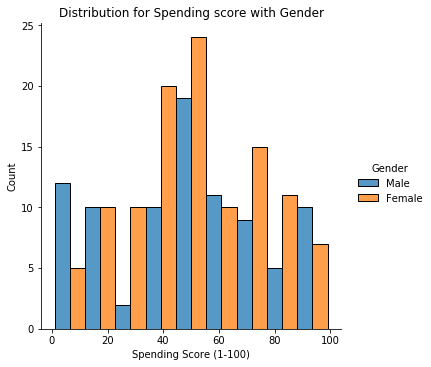

In [55]:
sns.displot(df, x="Spending Score (1-100)",hue="Gender",multiple="dodge")

plt.title("Distribution for Spending score with Gender")

plt.show()

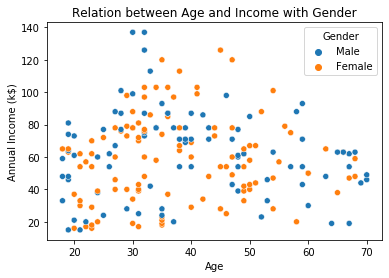

In [58]:
sns.scatterplot(data=df, x="Age",y="Annual Income (k$)",hue="Gender")

plt.title("Relation between Age and Income with Gender")

plt.show()

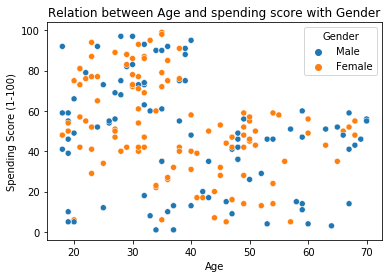

In [59]:
sns.scatterplot(data=df, x="Age",y="Spending Score (1-100)",hue="Gender")

plt.title("Relation between Age and spending score with Gender")

plt.show()

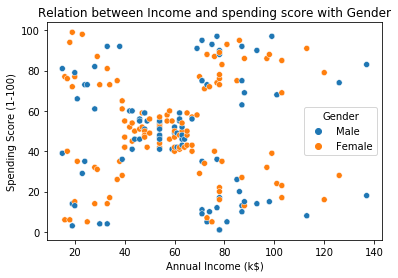

In [60]:
sns.scatterplot(data=df, x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender")

plt.title("Relation between Income and spending score with Gender")

plt.show()

### Step 4: Data Preprocessing

In [62]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [63]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


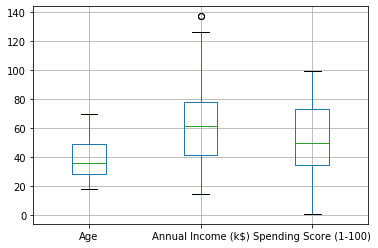

In [65]:
df.boxplot()
plt.show()

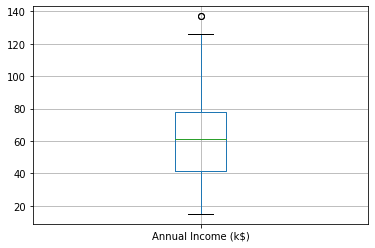

In [66]:
df.boxplot("Annual Income (k$)")

In [67]:
X = df.iloc[:, 2:4]    #[start_row : stop_row , start_col : stop_col]

X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [88]:
%%time

# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX = 15

wsse = []

# progress bar
with tqdm(total=K_MAX) as pbar:
    for i in range(1,K_MAX+1):
        kmeans = KMeans(n_clusters = i,  random_state = 10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)




Wall time: 675 ms


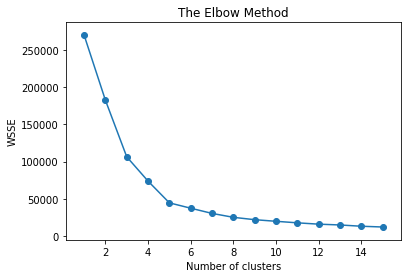

In [89]:
plt.plot(range(1,K_MAX+1),wsse)
plt.scatter(range(1, K_MAX+1),wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSSE")
plt.show()

In [90]:
print(wsse[4])

44448.45544793371


In [91]:
# Fitting K-means to the dataset
kmeans= KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [92]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [95]:
kmeans.n_iter_

3

In [96]:
df["Cluster"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


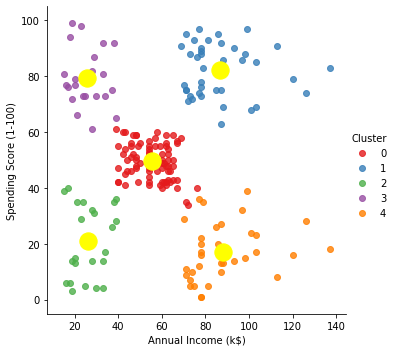

In [104]:
sns.lmplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",fit_reg=False, hue="Cluster",palette="Set1")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c="yellow")

plt.show()

In [102]:
df["Clusters"]=df.Cluster.map({0:"Careless",1:"Sensible",2:"Target",3:"NotUseful",4:"Careful"})

In [103]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clusters
CustomerID,,,,,,
1,Male,19,15,39,2,Target
2,Male,21,15,81,3,NotUseful
3,Female,20,16,6,2,Target
4,Female,23,16,77,3,NotUseful
5,Female,31,17,40,2,Target


In [105]:
df.to_csv("Data/TargetCustomer.csv",index=True)